In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix


plt.style.use('fivethirtyeight')

In [2]:
## Loading the data

ROOT_DIR = 'MNIST'

train_data = datasets.MNIST(
    root = ROOT_DIR,
    train = True,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True   

)

test_data = datasets.MNIST(
    root = ROOT_DIR,
    train = False,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True   

)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST\MNIST\raw\train-images-idx3-ubyte.gz to MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



102.8%


Extracting MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



112.7%

Extracting MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\MNIST\raw




c:\Users\Dhruv Saxena\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [21]:
train_data.data.max(), train_data.data.min()

(tensor(255, dtype=torch.uint8), tensor(0, dtype=torch.uint8))

In [7]:
train_data.data.dtype

torch.uint8

In [8]:
test_data.data.dtype

torch.uint8

In [9]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<Axes: >

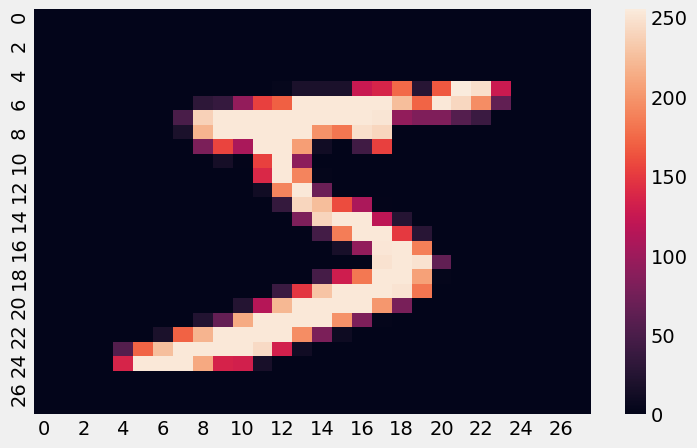

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(train_data.data[0])

<Axes: >

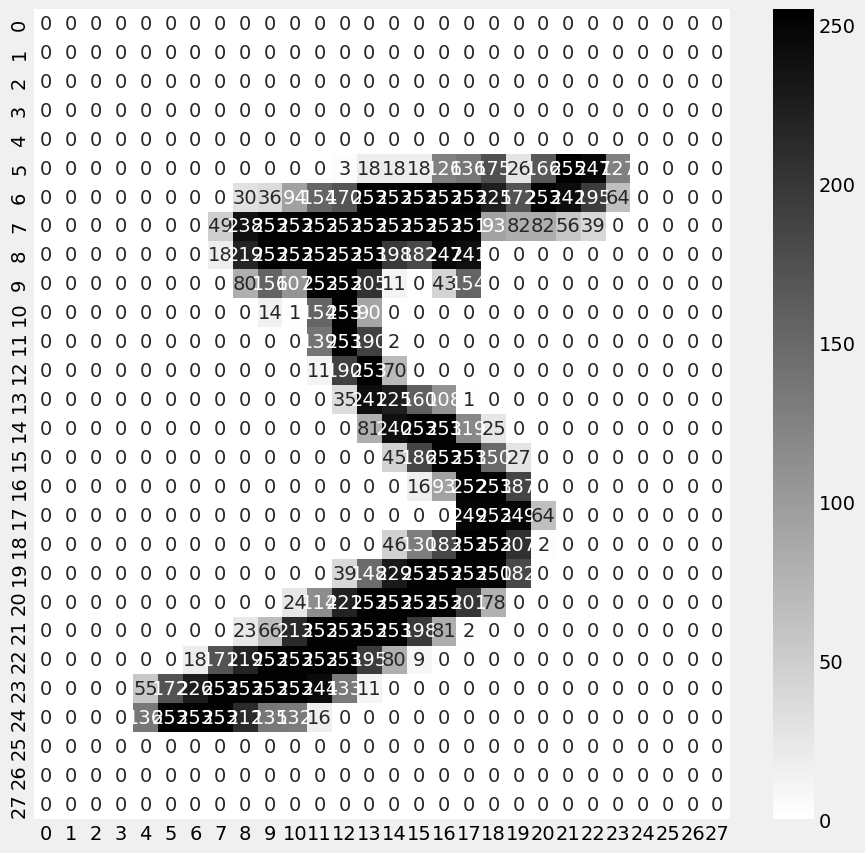

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.data[0], cmap="binary", annot=True, fmt='d')

## Data Loader

In [23]:
BATCH= 128
train_data_loader= DataLoader(dataset= train_data, 
                              batch_size= BATCH,
                              shuffle= True)

test_data_loader= DataLoader(dataset= test_data, 
                              batch_size= BATCH,
                              shuffle= True)

In [27]:
for x in train_data_loader:
    print(x[0].shape)
    print(x[1].shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [28]:
DEVICE= "cuda" if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

## Model Architecture 
#### ----> Defining the model using PyTorch (ANN)


In [32]:
# Lets define the model

class NeuralNetwork(nn.Module):
    def __init__(self, in_, out_):
        super(NeuralNetwork, self).__init__()
        self.layers= nn.Sequential(
            nn.Linear(in_, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, out_)
            )
    def forward(self, x):
        return self.layers(x)

In [33]:
model = NeuralNetwork(784, 10)
model.to(DEVICE)
model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [36]:
model.parameters()

<generator object Module.parameters at 0x00000232762DD660>

In [39]:
CE_loss= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters())

### Training the Model

In [46]:
## Training loop
EPOCHS = 10
loss_ = list()
acc_ = list()


for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}/{EPOCHS}")
    for batch, data in enumerate(train_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)
        
        optimizer.zero_grad()
        
        y_pred = model(x.reshape(-1, 784))
        
        loss = CE_loss(y_pred, y)
        
        loss_.append(loss.item())
        loss.backward()
        optimizer.step()
        
        accuracy = torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        acc_.append(accuracy)
        
        if batch%100 == 0:
            print(f"   Batch: {batch}, Loss: {loss.item():.4f} Accuracy {accuracy:.4f}")

Epoch: 1/10
   Batch: 0, Loss: 0.0008 Accuracy 1.0000
   Batch: 100, Loss: 0.0155 Accuracy 0.9922
   Batch: 200, Loss: 0.0037 Accuracy 1.0000
   Batch: 300, Loss: 0.0112 Accuracy 0.9922
   Batch: 400, Loss: 0.0083 Accuracy 1.0000
Epoch: 2/10
   Batch: 0, Loss: 0.0032 Accuracy 1.0000
   Batch: 100, Loss: 0.0031 Accuracy 1.0000
   Batch: 200, Loss: 0.0052 Accuracy 1.0000
   Batch: 300, Loss: 0.0070 Accuracy 1.0000
   Batch: 400, Loss: 0.0030 Accuracy 1.0000
Epoch: 3/10
   Batch: 0, Loss: 0.0158 Accuracy 0.9922
   Batch: 100, Loss: 0.0032 Accuracy 1.0000
   Batch: 200, Loss: 0.0014 Accuracy 1.0000
   Batch: 300, Loss: 0.0201 Accuracy 1.0000
   Batch: 400, Loss: 0.0081 Accuracy 1.0000
Epoch: 4/10
   Batch: 0, Loss: 0.0043 Accuracy 1.0000
   Batch: 100, Loss: 0.0167 Accuracy 0.9922
   Batch: 200, Loss: 0.0253 Accuracy 0.9844
   Batch: 300, Loss: 0.0003 Accuracy 1.0000
   Batch: 400, Loss: 0.0021 Accuracy 1.0000
Epoch: 5/10
   Batch: 0, Loss: 0.0060 Accuracy 1.0000
   Batch: 100, Loss: 0.002

<Axes: >

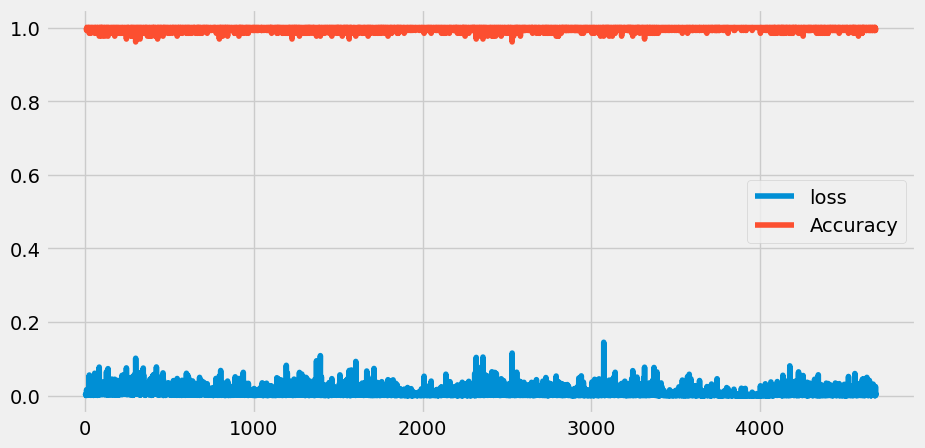

In [49]:
# plot the Train acc and loss
# plt.figure(figsize=(14,14))
pd.DataFrame(data={'loss': loss_, "Accuracy": acc_}).plot(figsize=(10,5))

In [51]:
# testing over the test data
test_loss = 0
test_acc = 0
with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)

        y_pred= model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)

        test_loss += loss.item()
        test_acc += torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        batch+=1

In [52]:
print(f"test loss: {test_loss/batch:.4f}, test accuracy: {test_acc/batch:.4f}")

test loss: 0.1010, test accuracy: 0.9814


In [53]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)        
        
        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)
        
        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, y.cpu().numpy()))  
        

In [54]:
cm = confusion_matrix(target, pred)

<Axes: >

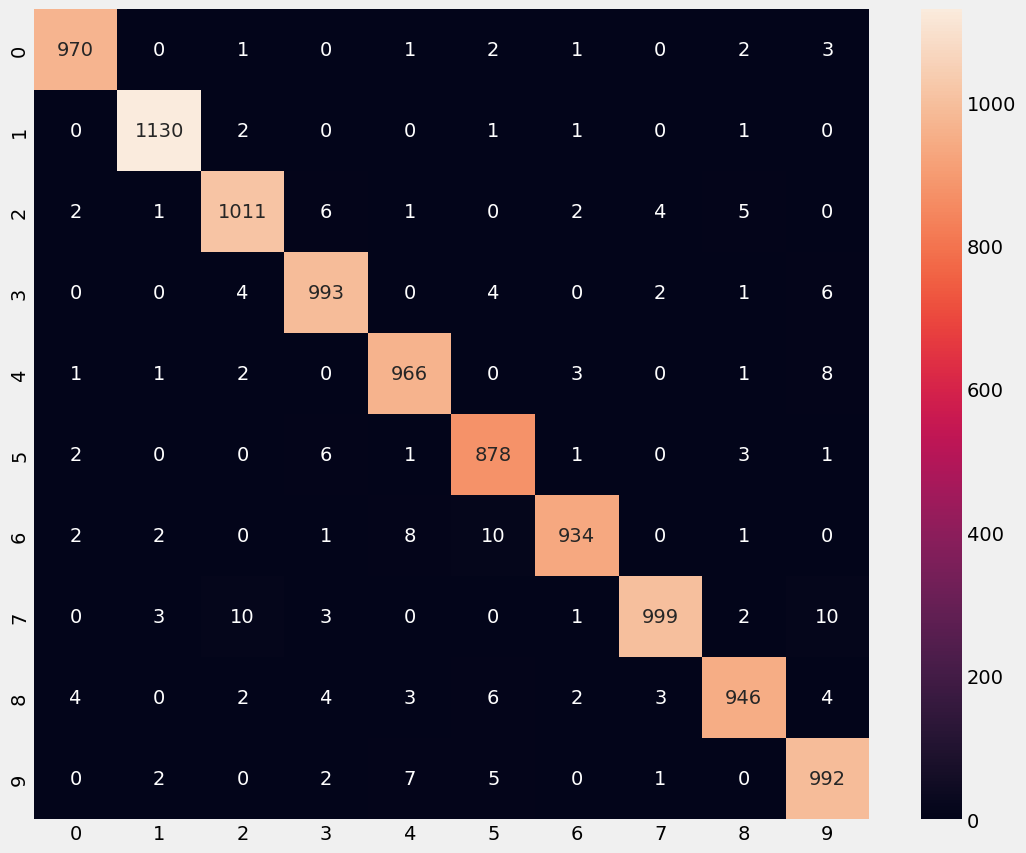

In [55]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d')